In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

random_state=42

# Data exploration

In [2]:
# Reading data from csv file and examine size of data as well as few rows of data
df = pd.read_csv("dataset.csv")
print(df.shape)
df.head()

(233154, 41)


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,01-06-1988,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,14-07-1994,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [3]:
# Let's get an idea about all the features available in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

Here we can see that there are 41 features. Now let's see the statistics of above data:

In [4]:
# Inspect the mean and standard deviation to see the scale of each features
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [5]:
# Now check if there is null value in the data!
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

As we can see that, **Employment.Type** has missing values which we will deal with later.

###### Seperating numerical and categorical features

In [6]:
# List of columns with numerical features
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'loan_default']

In [7]:
# List of columns with categorical features
categorical_feature_columns = list(set(df.columns) - set(numerical_feature_columns))
categorical_feature_columns

['CREDIT.HISTORY.LENGTH',
 'Date.of.Birth',
 'AVERAGE.ACCT.AGE',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'Employment.Type',
 'DisbursalDate']

Let's plot the histogram of below features to see its distribution

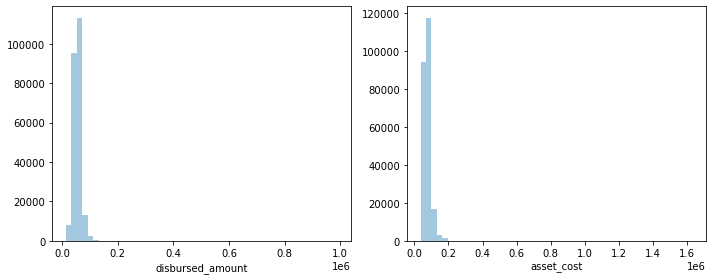

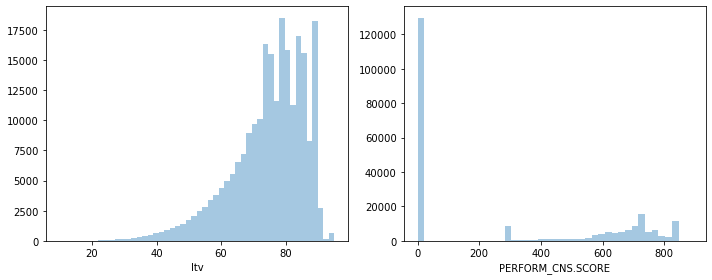

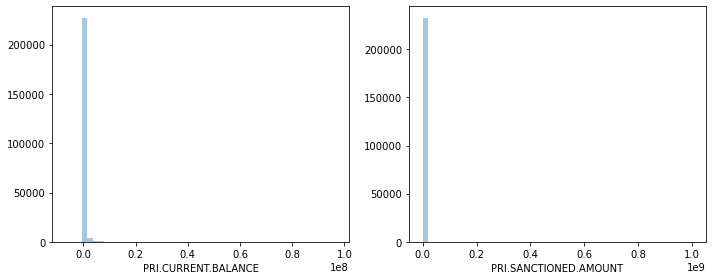

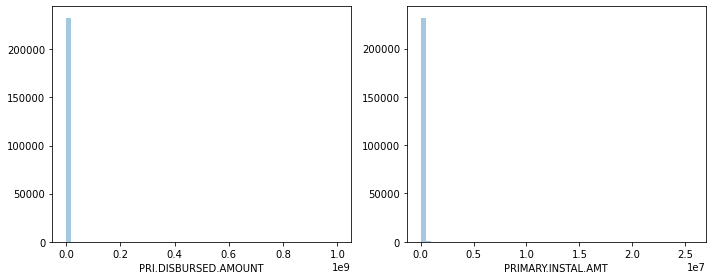

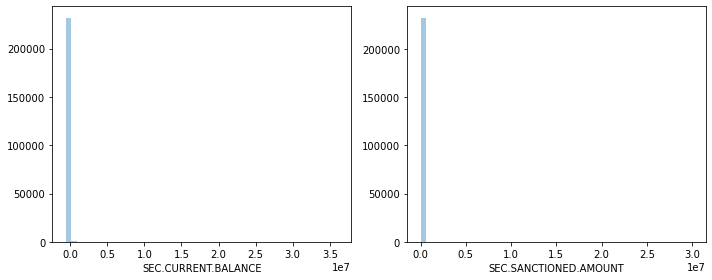

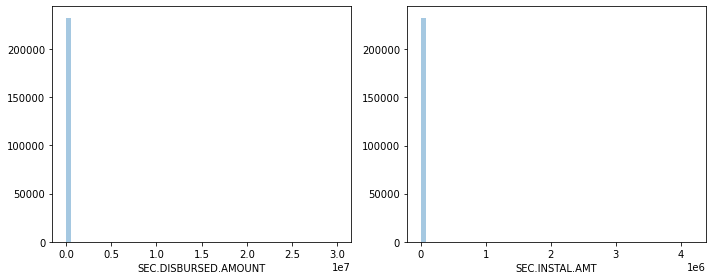

In [8]:
num_columns = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT',
            'PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT',
            'SEC.INSTAL.AMT']

for i in range(0, len(num_columns), 2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(df[num_columns[i]], kde=False)
    plt.subplot(122)            
    sns.distplot(df[num_columns[i+1]], kde=False)
    plt.tight_layout()
    plt.show()

Check categorical data

In [9]:
df[categorical_feature_columns].head()

,CREDIT.HISTORY.LENGTH,Date.of.Birth,AVERAGE.ACCT.AGE,PERFORM_CNS.SCORE.DESCRIPTION,Employment.Type,DisbursalDate
0,0yrs 0mon,01-01-1984,0yrs 0mon,No Bureau History Available,Salaried,03-08-2018
1,0yrs 0mon,24-08-1985,0yrs 0mon,No Bureau History Available,Self employed,01-08-2018
2,0yrs 0mon,09-12-1977,0yrs 0mon,No Bureau History Available,Self employed,26-09-2018
3,0yrs 0mon,01-06-1988,0yrs 0mon,No Bureau History Available,Salaried,23-09-2018
4,0yrs 0mon,14-07-1994,0yrs 0mon,No Bureau History Available,Self employed,08-10-2018


Two features **AVERAGE.ACCT.AGE** and **CREDIT.HISTORY.LENGTH** need to convert in terms of years.

In [10]:
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].str.replace('yrs ','.',regex=False)
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].str.replace('mon','',regex=False).astype(float)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].str.replace('yrs ','.',regex=False)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].str.replace('mon','',regex=False).astype(float)
df[categorical_feature_columns].head()

,CREDIT.HISTORY.LENGTH,Date.of.Birth,AVERAGE.ACCT.AGE,PERFORM_CNS.SCORE.DESCRIPTION,Employment.Type,DisbursalDate
0,0.0,01-01-1984,0.0,No Bureau History Available,Salaried,03-08-2018
1,0.0,24-08-1985,0.0,No Bureau History Available,Self employed,01-08-2018
2,0.0,09-12-1977,0.0,No Bureau History Available,Self employed,26-09-2018
3,0.0,01-06-1988,0.0,No Bureau History Available,Salaried,23-09-2018
4,0.0,14-07-1994,0.0,No Bureau History Available,Self employed,08-10-2018


Now let's examine the **Employment.Type** feature which has missing values.

In [11]:
df['Employment.Type'].isnull().sum()

7661

In [12]:
# Calculate missing percent value from whole dataset
total_null = df.isnull().sum()
percent_null = (total_null/(df.isnull().count())) * 100
missing_data = pd.concat([total_null,percent_null], keys=['Total','Percent'],axis=1)
print(missing_data)

                                     Total   Percent
UniqueID                                 0  0.000000
disbursed_amount                         0  0.000000
asset_cost                               0  0.000000
ltv                                      0  0.000000
branch_id                                0  0.000000
supplier_id                              0  0.000000
manufacturer_id                          0  0.000000
Current_pincode_ID                       0  0.000000
Date.of.Birth                            0  0.000000
Employment.Type                       7661  3.285811
DisbursalDate                            0  0.000000
State_ID                                 0  0.000000
Employee_code_ID                         0  0.000000
MobileNo_Avl_Flag                        0  0.000000
Aadhar_flag                              0  0.000000
PAN_flag                                 0  0.000000
VoterID_flag                             0  0.000000
Driving_flag                             0  0.

Missing values contains only **3.285%** of the data, hence we can drop it.

In [13]:
df.dropna(inplace=True)
total_null_1 = df.isnull().sum()
percent_null_1 = (total_null_1/(df.isnull().count())) * 100
missing_data_1 = pd.concat([total_null_1,percent_null_1], keys=['Total','Percent'],axis=1)
print(missing_data_1)

                                     Total  Percent
UniqueID                                 0      0.0
disbursed_amount                         0      0.0
asset_cost                               0      0.0
ltv                                      0      0.0
branch_id                                0      0.0
supplier_id                              0      0.0
manufacturer_id                          0      0.0
Current_pincode_ID                       0      0.0
Date.of.Birth                            0      0.0
Employment.Type                          0      0.0
DisbursalDate                            0      0.0
State_ID                                 0      0.0
Employee_code_ID                         0      0.0
MobileNo_Avl_Flag                        0      0.0
Aadhar_flag                              0      0.0
PAN_flag                                 0      0.0
VoterID_flag                             0      0.0
Driving_flag                             0      0.0
Passport_fla

In [14]:
# Count the each category values from feature
df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [15]:
# Encode the values in terms of 0 and 1
df['Employment.Type'].replace({'Salaried': 0, 'Self employed': 1}, inplace=True)

In [16]:
# Dropping unecessary features
df.drop(['Date.of.Birth','DisbursalDate','PERFORM_CNS.SCORE.DESCRIPTION'], axis = 1, inplace=True)

In [17]:
# Now let's check if null values present in data
df.isnull().sum().sum()

0

In [18]:
# Size of the data
df.shape

(225493, 38)

In [19]:
# Identify unique values in each features
df.nunique()

UniqueID                               225493
disbursed_amount                        24228
asset_cost                              45415
ltv                                      6541
branch_id                                  82
supplier_id                              2945
manufacturer_id                            11
Current_pincode_ID                       6659
Employment.Type                             2
State_ID                                   22
Employee_code_ID                         3269
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PRI.NO.OF.ACCTS                           107
PRI.ACTIVE.ACCTS                           40
PRI.OVERDUE.ACCTS                          22
PRI.CURRENT.BALANCE               

Calculate correlation matrix to inspect correlation among features:

In [20]:
corr_max = df.corr()  #create correlation matrix
threshold = 0.5
corr_var_list = []
cols = df.columns.tolist()

for i in range(1, len(cols)):
    for j in range(i):
        if((abs(corr_max.iloc[i,j]) > threshold) & (abs(corr_max.iloc[i,j]) < 1)):
            corr_var_list.append([corr_max.iloc[i,j], i, j])

# Sort the list showing higher ones first 
sort_corr_list = sorted(corr_var_list, key=lambda x:abs(x[0]))

#Print correlations and column names
for corr_value, i, j in sort_corr_list:
    print (f"{cols[i]} and {cols[j]} = {round(corr_value, 2)}")

SEC.OVERDUE.ACCTS and SEC.NO.OF.ACCTS = 0.51
SEC.OVERDUE.ACCTS and SEC.ACTIVE.ACCTS = 0.53
NEW.ACCTS.IN.LAST.SIX.MONTHS and PRI.NO.OF.ACCTS = 0.54
NEW.ACCTS.IN.LAST.SIX.MONTHS and PRI.ACTIVE.ACCTS = 0.7
asset_cost and disbursed_amount = 0.75
PRI.ACTIVE.ACCTS and PRI.NO.OF.ACCTS = 0.75
CREDIT.HISTORY.LENGTH and AVERAGE.ACCT.AGE = 0.82
SEC.ACTIVE.ACCTS and SEC.NO.OF.ACCTS = 0.83
VoterID_flag and Aadhar_flag = -0.87
SEC.SANCTIONED.AMOUNT and SEC.CURRENT.BALANCE = 0.93
SEC.DISBURSED.AMOUNT and SEC.CURRENT.BALANCE = 0.93
PRI.DISBURSED.AMOUNT and PRI.SANCTIONED.AMOUNT = 1.0
SEC.DISBURSED.AMOUNT and SEC.SANCTIONED.AMOUNT = 1.0


Plotting distribution of classes of target variable:

Distribution of the loan_default in the dataset
0    0.782845
1    0.217155
Name: loan_default, dtype: float64


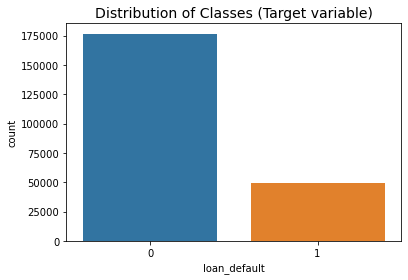

In [21]:
print('Distribution of the loan_default in the dataset')
print(df['loan_default'].value_counts()/len(df))

sns.countplot('loan_default', data=df)
plt.title('Distribution of Classes (Target variable)', fontsize=14)
plt.show()

Here we clearly see the imbalance between two classes. We need to resolve class imbalance by oversampling class 1.

In [22]:
# Over sampling to resolve imbalance
df = df.sample(frac=1)
loan_default_1 = df.loc[df['loan_default'] == 1]
loan_default_0 = df.loc[df['loan_default'] == 0]

normal_distributed_df = pd.concat([loan_default_1, loan_default_1, loan_default_1, loan_default_0])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
141297,515782,58947,72294,84.38,19,14375,86,1860,0,4,...,0,0,0,0,1,0,0.11,3.5,0,0
17387,442841,34939,65349,55.09,19,21264,86,1838,0,4,...,0,0,0,0,0,0,0.00,0.0,0,0
32736,469542,36639,55058,68.47,34,20520,45,1061,1,6,...,0,0,0,0,0,0,0.00,0.0,0,1
230709,526190,59713,73000,84.25,146,21003,86,2956,1,14,...,0,0,5647,0,2,0,0.00,0.0,0,1
149084,612710,47349,70000,68.57,147,19528,86,2799,0,2,...,0,0,9191,0,2,0,1.30,3.4,0,0


Distribution of the loan_default in the dataset
0    0.545799
1    0.454201
Name: loan_default, dtype: float64


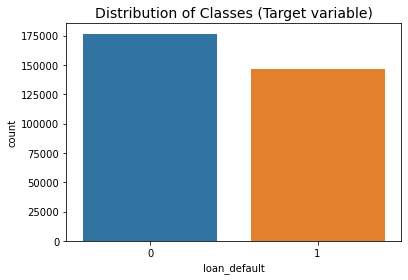

In [23]:
print('Distribution of the loan_default in the dataset')
print(new_df['loan_default'].value_counts()/len(new_df))

sns.countplot('loan_default', data=new_df)
plt.title('Distribution of Classes (Target variable)', fontsize=14)
plt.show()

In [24]:
# Size of dataset after over sampling
new_df.shape

(323427, 38)

Seperate features and target variable

In [25]:
X = new_df.drop('loan_default', axis=1)
y = new_df['loan_default'].copy()

Split train and test data with 70:30 ratio

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)

In [27]:
print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)

X_train size:  (226398, 37)
X_test size:  (97029, 37)


## Build and evaluate models

Define evaluation function which calculates following metrics:
- Confusion matrix
- Accuracy score
- Precision
- Recall
- F1 score
- ROC AUC score.

In [28]:
def evaluate_model(y_test, y_pred):
    print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
    print("Precision: ",metrics.precision_score(y_test, y_pred))
    print("Recall: ",metrics.recall_score(y_test, y_pred))
    print("f1 score: ",metrics.f1_score(y_test, y_pred))
    print("roc_auc_score: ",metrics.roc_auc_score(y_test, y_pred))

#### Scaling data before model training and testing

In [29]:
# Scaling training and testing data
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1. Logistic Regression

In [30]:
# Find best parameters using grid search
params = {'C':[0.1, 0.5, 1, 5]}

lr = LogisticRegression()
grid = GridSearchCV(estimator=lr, param_grid=params)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[38062 14945]
 [24209 19813]]
Accuracy:  0.59647115810737
Precision:  0.5700270441337246
Recall:  0.4500704193357867
f1 score:  0.502995684183803
roc_auc_score:  0.5840632625665672


### 2. Decision Trees

In [31]:
params = {'criterion':['gini','entropy'], 'max_depth': [2,3,4,5]}
dt = DecisionTreeClassifier()
dt_clf = GridSearchCV(dt, params)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[32461 20546]
 [19227 24795]]
Accuracy:  0.5900916220923641
Precision:  0.5468560464039169
Recall:  0.5632411067193676
f1 score:  0.5549276546221591
roc_auc_score:  0.5878159615133239


### 3. Random Forest


In [32]:
rf = RandomForestClassifier(n_estimators=250, random_state=random_state)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[47875  5132]
 [ 3207 40815]]
Accuracy:  0.914056622246957
Precision:  0.8883060918014234
Recall:  0.9271500613329698
f1 score:  0.9073125187564606
roc_auc_score:  0.9151663299288465


## Conclusion

In this classification problem, it is clear the Random Forest Classifier outperformes Logistic Regression and Decision Trees models.